# API we will use: Companies House

Companies house is the official public  register of all companies in the UK. You can search for companiers, peope etc. You can also get basic information about many companies, or request detailed information about one company. You will need to create an account - probably best if you use your university email address. You can find more information on companies house website and https://developer.company-information.service.gov.uk/get-started. 

# How to create a company house developer account:

note: depending on your setup, links might not work when you click them. You can try right-click and 'copy link address', or just copy-pasting these links.

- Go to 'register a user account' link https://identity.company-information.service.gov.uk/oauth2/user/signin, enter your **school email** and then click the link you received by email
- setup a password
- login to https://identity.company-information.service.gov.uk/oauth2/user/signin
- go to New Application on top (https://developer.company-information.service.gov.uk/manage-applications/add)
- ented a name and short description for your API project (just say it's a univeristy project) and choose **Live in 'environment for your application'**. Leave other options blank.
- go to 'View all applications' (https://developer.company-information.service.gov.uk/manage-applications)
- click on the name of your application, and then 'Create new key'
- Select these options:
-    Key name and description: here write anything, like 'python project'
-    Select the type of API client key you want to create: REST
- leave other options empty, and click 'Create Key'
- When done, scroll down and copy-paste yoru key to this notebook. key will look a bit like this: 	e3aaad12-fd44-4aad-9389-f7dccccc67f9

Once you are set up:

- all the possible requests can be found here: https://developer-specs.company-information.service.gov.uk/companies-house-public-data-api/reference
- by the way: you are allowed to ask 600 requests within each five-minute period, after that persiod, you get another 600. If you use up all the 600 questions, API will make you wait for a few seconds/minutes.

# Business Question

1. How many **kebab** and **sushi** restaurants are operating in the UK? Which one grows faster in the last few years?
2. Do **kebab** and **sushi** restaurants only operate in major cities? Is there any differences between their popularity in 2015 and 2021?

In [1]:
# Import necessary libraries
import requests
import json
import math
import pprint as pp
import datetime
from datetime import date 
from datetime import datetime
import pandas as pd
from pandas import json_normalize
import numpy as np
!pip install pgeocode
import pgeocode
import plotly.express as px
import time
import plotly.io as pio
from IPython.display import Image
import plotly.graph_objects as go
!pip install plotly==5.3.1
!pip install kaleido

In [2]:
# Calling the API to retrieve JSON
def call_api_with(url_extension):
    your_company_house_api_key ="df0293b7-12e1-4ea9-9b20-064a19c8e071"
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"
    print(f'Requesting: {url}')
    result = requests.get(url, headers=login_headers)
    return result.json()

In [3]:
# Get company info via API
def search_for_companies_with_query(company_name_keyword, total_iteration = 5, company_count = 100):
    current_iteration = 1 # Each iteration will retrieve 100 records
    index = 1
    print(f'Initiating API request for {company_name_keyword} companies...')
    url = f"search/companies?q={company_name_keyword}&items_per_page={company_count}&start_index={index}"
    result = call_api_with(url).get('items', [])
    index += len(result)-1 # To avoid repetition, each iteration must start at the last index of the previous iteration
    print(f'Iteration number {current_iteration} is finished')
    current_iteration +=1
    while current_iteration <= total_iteration:
        url = f"search/companies?q={company_name_keyword}&items_per_page={company_count}&start_index={index}"
        new_result = call_api_with(url).get('items', [])
        result += new_result
        index += len(new_result) # To avoid repetition, each iteration must start at the last index of the previous iteration
        print(f'Iteration number {current_iteration} is finished')
        current_iteration +=1
    print(f'API request for {company_name_keyword} companies is finished. Successfully obtained {len(result)} records from {current_iteration-1} iterations. \n')
    return result

In [4]:
# Create company dataframe
def company_raw_df(company_name_keyword, company_count, total_iteration):
    get_company = search_for_companies_with_query(company_name_keyword, total_iteration = total_iteration, company_count = company_count) # Get company list
    company_json_to_df = pd.DataFrame.from_records(get_company) # Convert the json data into dataframe
    company_df = pd.DataFrame().append(company_json_to_df, ignore_index=True) # Convert the json data into dataframe
    company_df = company_df.drop(['kind'], axis = 1) # Drop unneccessary columns
    company_df = company_df[['company_number','title','snippet','description','description_identifier','company_type','company_status','date_of_creation','date_of_cessation','links','matches','address','address_snippet']] # Rearrange column name to make it easier to read
    return company_df

In [5]:
# Get kebab companies
kebab_df = company_raw_df("kebab", company_count = 100, total_iteration = 10)

# Get sushi companies
sushi_df = company_raw_df("sushi", company_count = 100, total_iteration = 10)

Initiating API request for kebab companies...
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=1
Iteration number 1 is finished
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=100
Iteration number 2 is finished
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=200
Iteration number 3 is finished
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=300
Iteration number 4 is finished
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=400
Iteration number 5 is finished
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=500
Iteration number 6 is finished
Requesting: https://api.companieshouse.gov.uk/search/companies?q=kebab&items_per_page=100&start_index=600
Iteration number 7 is finish

In [6]:
# Check unique company number for each dataset
unique_kebab_companies = kebab_df.agg({'company_number':pd.Series.nunique})[0]
unique_sushi_companies = sushi_df.agg({'company_number':pd.Series.nunique})[0]

print(f'There are {unique_kebab_companies} unique companies in Kebab dataframe')
print(f'There are {unique_sushi_companies} unique companies in Sushi dataframe')

There are 1000 unique companies in Kebab dataframe
There are 1000 unique companies in Sushi dataframe


### 1B. Get company details via API

In [7]:
# Get company detailed info via API
def get_company_details(df):
    company_detail_df = pd.DataFrame()
    index = 0
    current_iteration = 1 # Each iteration will only call 500 records, so we don't exceed the API call limit.
    waiting_time = 300 # Presented in seconds. We need this because we can only request 600 API calls within 5 minutes, when we have 1000 company records in our dataset
    while index < len(df):
        if current_iteration == 1:
            print(f'Initiating iteration number {current_iteration}...')
            for i,col in df['company_number'][index:(index+500)].items():
                company_detail_url = f"company/{col}"
                get_company_detail = call_api_with(company_detail_url)
                company_detail_json_to_df = json_normalize(get_company_detail)
                company_detail_df = company_detail_df.append(company_detail_json_to_df, ignore_index=True)
            index += len(company_detail_df)
            current_iteration += 1
            print(f'Successfully obtained {len(company_detail_df)} records of company details')
        else:
            print(f'Waiting for {waiting_time} seconds before starting another iteration...')
            time.sleep(waiting_time)
            print(f'Initiating iteration number {current_iteration}...')
            for i,col in df['company_number'][index:(index+500)].items():
                company_detail_url = f"company/{col}"
                get_company_detail = call_api_with(company_detail_url)
                company_detail_json_to_df = json_normalize(get_company_detail)
                company_detail_df = company_detail_df.append(company_detail_json_to_df, ignore_index=True)
            index += len(company_detail_df)
            current_iteration += 1
            print(f'Successfully obtained {len(company_detail_df)} records of company details')          
    
    print(f'API request is finished')
    return company_detail_df

In [8]:
# Get kebab and sushi company details
kebab_company_detail_df = get_company_details(kebab_df)
time.sleep(300)
sushi_company_detail_df = get_company_details(sushi_df)

Initiating iteration number 1...
Requesting: https://api.companieshouse.gov.uk/company/10822014
Requesting: https://api.companieshouse.gov.uk/company/11466992
Requesting: https://api.companieshouse.gov.uk/company/13094936
Requesting: https://api.companieshouse.gov.uk/company/10834872
Requesting: https://api.companieshouse.gov.uk/company/12258525
Requesting: https://api.companieshouse.gov.uk/company/09244846
Requesting: https://api.companieshouse.gov.uk/company/10861461
Requesting: https://api.companieshouse.gov.uk/company/10361906
Requesting: https://api.companieshouse.gov.uk/company/09706421
Requesting: https://api.companieshouse.gov.uk/company/12323960
Requesting: https://api.companieshouse.gov.uk/company/13486047
Requesting: https://api.companieshouse.gov.uk/company/11133067
Requesting: https://api.companieshouse.gov.uk/company/11664937
Requesting: https://api.companieshouse.gov.uk/company/11169261
Requesting: https://api.companieshouse.gov.uk/company/08588450
Requesting: https://ap

In [9]:
# Merge company details into the original dataframe
kebab_df = kebab_df.merge(kebab_company_detail_df[['company_number','sic_codes']], how = 'left', left_on = 'company_number', right_on = 'company_number')
sushi_df = sushi_df.merge(sushi_company_detail_df[['company_number','sic_codes']], how = 'left', left_on = 'company_number', right_on = 'company_number')

### 1C. Parse date_of_creation and date_of_cessation to extract creation_year and cessation_year

In [10]:
# Clean date format
def remove_incorrect_date_of_creation(df):
    date_of_creation_format=[]
    for i,col in df['date_of_creation'].items():
        if str(col) != 'nan':
            try:
                datetime.strptime(str(col), '%Y-%m-%d') # All dates must be in YYYY-MM-DD format
                date_of_creation_format.append("Correct")
            except ValueError:
                date_of_creation_format.append("Incorrect") 
        else:
            date_of_creation_format.append("Correct")
    df['date_of_creation_format'] = date_of_creation_format
    df = df[df['date_of_creation_format']=='Correct']
    
    return df
        
def remove_incorrect_date_of_cessation(df):
    date_of_cessation_format=[]
    for i,col in df['date_of_cessation'].items():
        if str(col) != 'nan':
            try:
                datetime.strptime(str(col), '%Y-%m-%d') # All dates must be in YYYY-MM-DD format
                date_of_cessation_format.append("Correct")
            except ValueError:
                date_of_cessation_format.append("Incorrect") 
        else:
            date_of_cessation_format.append("Correct")       
    df['date_of_cessation_format'] = date_of_cessation_format
    df = df[df['date_of_cessation_format']=='Correct']
    return df

In [11]:
# Clean date format
kebab_df = remove_incorrect_date_of_creation(kebab_df)
kebab_df = remove_incorrect_date_of_cessation(kebab_df)

sushi_df = remove_incorrect_date_of_creation(sushi_df)
sushi_df = remove_incorrect_date_of_cessation(sushi_df)

In [12]:
# Extract year from date_of_creation
def get_creation_year(df):
    creation_year=[]
    for i,col in df['date_of_creation'].items():
        if str(col) != 'nan':
            creation_year.append(pd.to_datetime(col, format='%Y-%m-%d').strftime('%Y'))
        else:
            creation_year.append(np.nan)
    return creation_year

In [13]:
# Extract year from date_of_cessation
def get_cessation_year(df):
    cessation_year=[]
    for i,col in df['date_of_cessation'].items():
        if str(col) != 'nan':
            cessation_year.append(pd.to_datetime(col, format='%Y-%m-%d').strftime('%Y'))
        else:
            cessation_year.append(np.nan)
    return cessation_year

In [14]:
# Add creation year into dataframe
kebab_df['creation_year'] = get_creation_year(kebab_df)
sushi_df['creation_year'] = get_creation_year(sushi_df)

# Add cessation year into dataframe
kebab_df['cessation_year'] = get_cessation_year(kebab_df)
sushi_df['cessation_year'] = get_cessation_year(sushi_df)

### 1D. Parse address to get postal_code

In [15]:
# Create a function to parse the address
def parse_address(df):
    df = df.assign(**pd.DataFrame(df['address'].values.tolist()))
    return df

In [16]:
# Parse the address
kebab_df = parse_address(kebab_df)
sushi_df = parse_address(sushi_df)

### 1E. Get latitude, longitude, state_name, and county_name from postal_code

In [17]:
# Create a function to get the location details from postal_code
def get_coordinates(df):
    latitude = []
    longitude = []
    county_name = []
    state_name = []
    for i,col in df['postal_code'].items():
        if str(col) != 'nan':
            latitude.append(pgeocode.Nominatim('gb').query_postal_code(col)['latitude'])
            longitude.append(pgeocode.Nominatim('gb').query_postal_code(col)['longitude'])  
            county_name.append(pgeocode.Nominatim('gb').query_postal_code(col)['county_name'])
            state_name.append(pgeocode.Nominatim('gb').query_postal_code(col)['state_name'])
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)
            county_name.append(np.nan)
            county_name.append(np.nan)
        
    df['latitude'] = latitude
    df['longitude'] = longitude
    df['county_name'] = county_name
    df['state_name'] = state_name
    
    return df

In [18]:
%%time
kebab_df = get_coordinates(kebab_df)
sushi_df = get_coordinates(sushi_df)

CPU times: user 4min 58s, sys: 23.5 s, total: 5min 22s
Wall time: 5min 23s


# 2. Data cleaning

### 2A. Handling missing data

In [19]:
# Create a function to calculate the percentage of null values in the dataframe
def check_missing_values(df, df_name):
    print(f'Percentage of null values in {df_name}')
    print('---------------------------------------------')
    for i, col in df.items():
        count_null = col.isnull()
        percentage_null = count_null.sum() * 100.0 / np.shape(df)[0]
        print(f'Percentage of null values in column {i} = {percentage_null}%')

In [20]:
# Check missing values in kebab dataframe
check_missing_values(kebab_df, "Kebab Dataframe")

print('\n')

# Check missing values in sushi dataframe
check_missing_values(sushi_df, "Sushi Dataframe")

Percentage of null values in Kebab Dataframe
---------------------------------------------
Percentage of null values in column company_number = 0.0%
Percentage of null values in column title = 0.0%
Percentage of null values in column snippet = 0.0%
Percentage of null values in column description = 0.0%
Percentage of null values in column description_identifier = 0.0%
Percentage of null values in column company_type = 0.0%
Percentage of null values in column company_status = 0.0%
Percentage of null values in column date_of_creation = 0.0%
Percentage of null values in column date_of_cessation = 66.5%
Percentage of null values in column links = 0.0%
Percentage of null values in column matches = 0.0%
Percentage of null values in column address = 0.0%
Percentage of null values in column address_snippet = 0.0%
Percentage of null values in column sic_codes = 5.9%
Percentage of null values in column date_of_creation_format = 0.0%
Percentage of null values in column date_of_cessation_format = 0

To handle missing values, we will do the following:
- Remove the entire columns that we don't need in the analysis
- Remove rows with missing values
- We will keep the records with missing `date_of_cessation` because it is expected. An empty date_of_cessation indicates that the company is still active

In [21]:
# Remove unnecessary columns
kebab_df = kebab_df.drop(columns={'snippet','matches','premises','country','address_line_1','locality','address_line_2','country','locality','address_line_1','region','care_of_name'})
sushi_df = sushi_df.drop(columns={'snippet','matches','premises','country','address_line_1','locality','address_line_2','country','locality','address_line_1','region','care_of_name'})

In [22]:
# Remove rows with missing sic_codes, latitude, longitude, and county_name
kebab_df = kebab_df[(kebab_df['sic_codes'].notnull()) & (kebab_df['latitude'].notnull()) & (kebab_df['longitude'].notnull()) & (kebab_df['county_name'].notnull())]
sushi_df = sushi_df[(sushi_df['sic_codes'].notnull()) & (sushi_df['latitude'].notnull()) & (sushi_df['longitude'].notnull()) & (sushi_df['county_name'].notnull())]

### 2B. Filter companies by SIC code

Companies with the word "kebab" and "sushi" are not necessarily restaurants. Therefore, we are going to filter these companies by their SIC codes. Based on gov.uk website, here are the SIC codes for restaurants:

- 56101:	Licensed restaurants
- 56102:	Unlicensed restaurants and cafes

In [23]:
# Transform sic_codes from list to string
kebab_df['sic_code_string'] = [','.join(map(str, l)) for l in kebab_df['sic_codes']]
sushi_df['sic_code_string'] = [','.join(map(str, l)) for l in sushi_df['sic_codes']]

In [24]:
# Create a function to filter companies by sic_codes
def filter_company_by_sic_code(df, sic_codes):
    df = df[df['sic_code_string'].str.contains(sic_codes)]  
    return df

In [25]:
# Filter companies by sic_codes
kebab_df = filter_company_by_sic_code(kebab_df, '5610')
sushi_df = filter_company_by_sic_code(sushi_df, '5610')

### 2C. Validate if we have handled all missing data and remove unnecessary columns

Note: We accept null values in `date_of_cessation` and `cessation_year` because it indicates that the company is still active until now.

In [26]:
# Check null values in kebab dataframe
check_missing_values(kebab_df, "Kebab Dataframe")

print('\n')

# Check null values in sushi dataframe
check_missing_values(sushi_df, "Sushi Dataframe")

Percentage of null values in Kebab Dataframe
---------------------------------------------
Percentage of null values in column company_number = 0.0%
Percentage of null values in column title = 0.0%
Percentage of null values in column description = 0.0%
Percentage of null values in column description_identifier = 0.0%
Percentage of null values in column company_type = 0.0%
Percentage of null values in column company_status = 0.0%
Percentage of null values in column date_of_creation = 0.0%
Percentage of null values in column date_of_cessation = 73.95287958115183%
Percentage of null values in column links = 0.0%
Percentage of null values in column address = 0.0%
Percentage of null values in column address_snippet = 0.0%
Percentage of null values in column sic_codes = 0.0%
Percentage of null values in column date_of_creation_format = 0.0%
Percentage of null values in column date_of_cessation_format = 0.0%
Percentage of null values in column creation_year = 0.0%
Percentage of null values in

# 3. Analysis

### 3A. Number of active companies over year

In [27]:
# Create a function to check whether a company is active or not in the given year
def get_active_flag(df, year):
    active_flag_list = []
    for i,col in df.iterrows():
        if str(df['creation_year'][i]) != 'nan' and str(df['cessation_year'][i]) != 'nan':
            if int(df['creation_year'][i]) <= year & int(df['cessation_year'][i]) > year:
                active_flag_list.append(1)
            else:
                active_flag_list.append(0)
        elif str(df['creation_year'][i]) == 'nan' and str(df['cessation_year'][i]) != 'nan':
            active_flag_list.append(0)
        elif str(df['creation_year'][i]) != 'nan' and str(df['cessation_year'][i]) == 'nan':
            if int(df['creation_year'][i]) <= year:
                active_flag_list.append(1)
            else:
                active_flag_list.append(0)
        else:
            active_flag_list.append(0)
    return active_flag_list

In [28]:
# Get company's active flag for kebab companies
kebab_df['active_2015'] = get_active_flag(kebab_df, 2015)
kebab_df['active_2016'] = get_active_flag(kebab_df, 2016)
kebab_df['active_2017'] = get_active_flag(kebab_df, 2017)
kebab_df['active_2018'] = get_active_flag(kebab_df, 2018)
kebab_df['active_2019'] = get_active_flag(kebab_df, 2019)
kebab_df['active_2020'] = get_active_flag(kebab_df, 2020)
kebab_df['active_2021'] = get_active_flag(kebab_df, 2021)

# Get company's active flag for sushi companies
sushi_df['active_2015'] = get_active_flag(sushi_df, 2015)
sushi_df['active_2016'] = get_active_flag(sushi_df, 2016)
sushi_df['active_2017'] = get_active_flag(sushi_df, 2017)
sushi_df['active_2018'] = get_active_flag(sushi_df, 2018)
sushi_df['active_2019'] = get_active_flag(sushi_df, 2019)
sushi_df['active_2020'] = get_active_flag(sushi_df, 2020)
sushi_df['active_2021'] = get_active_flag(sushi_df, 2021)

In [29]:
# Calculate unique active companies of each year
kebab_total_active_2015 = int(kebab_df[kebab_df['active_2015']==1].agg({'company_number':pd.Series.nunique}))
kebab_total_active_2016 = int(kebab_df[kebab_df['active_2016']==1].agg({'company_number':pd.Series.nunique}))
kebab_total_active_2017 = int(kebab_df[kebab_df['active_2017']==1].agg({'company_number':pd.Series.nunique}))
kebab_total_active_2018 = int(kebab_df[kebab_df['active_2018']==1].agg({'company_number':pd.Series.nunique}))
kebab_total_active_2019 = int(kebab_df[kebab_df['active_2019']==1].agg({'company_number':pd.Series.nunique}))
kebab_total_active_2020 = int(kebab_df[kebab_df['active_2020']==1].agg({'company_number':pd.Series.nunique}))
kebab_total_active_2021 = int(kebab_df[kebab_df['active_2021']==1].agg({'company_number':pd.Series.nunique}))

# Create a list of total active companies
kebab_total_active_companies = [['2015', kebab_total_active_2015],
                                ['2016', kebab_total_active_2016],
                                ['2017', kebab_total_active_2017],
                                ['2018', kebab_total_active_2018],
                                ['2019', kebab_total_active_2019],
                                ['2020', kebab_total_active_2020],
                                ['2021', kebab_total_active_2021]
                               ]

# Create a dataframe from the list
kebab_active_companies_by_year = pd.DataFrame(kebab_total_active_companies, columns = ['year','total_active_kebab_restaurants'])
kebab_active_companies_by_year

,year,total_active_kebab_restaurants
0,2015,60
1,2016,85
2,2017,123
3,2018,185
4,2019,292
5,2020,421
6,2021,565


In [30]:
# Calculate unique active companies of each year
sushi_total_active_2015 = int(sushi_df[sushi_df['active_2015']==1].agg({'company_number':pd.Series.nunique}))
sushi_total_active_2016 = int(sushi_df[sushi_df['active_2016']==1].agg({'company_number':pd.Series.nunique}))
sushi_total_active_2017 = int(sushi_df[sushi_df['active_2017']==1].agg({'company_number':pd.Series.nunique}))
sushi_total_active_2018 = int(sushi_df[sushi_df['active_2018']==1].agg({'company_number':pd.Series.nunique}))
sushi_total_active_2019 = int(sushi_df[sushi_df['active_2019']==1].agg({'company_number':pd.Series.nunique}))
sushi_total_active_2020 = int(sushi_df[sushi_df['active_2020']==1].agg({'company_number':pd.Series.nunique}))
sushi_total_active_2021 = int(sushi_df[sushi_df['active_2021']==1].agg({'company_number':pd.Series.nunique}))

# Create a list of total active companies
sushi_total_active_companies = [['2015', sushi_total_active_2015],
                                ['2016', sushi_total_active_2016],
                                ['2017', sushi_total_active_2017],
                                ['2018', sushi_total_active_2018],
                                ['2019', sushi_total_active_2019],
                                ['2020', sushi_total_active_2020],
                                ['2021', sushi_total_active_2021]
                               ]

# Create a dataframe from the list
sushi_active_companies_by_year = pd.DataFrame(sushi_total_active_companies, columns = ['year','total_active_sushi_restaurants'])
sushi_active_companies_by_year

,year,total_active_sushi_restaurants
0,2015,59
1,2016,85
2,2017,127
3,2018,172
4,2019,228
5,2020,326
6,2021,476


In [31]:
# Merge kebab and sushi active companies
active_companies_by_year = kebab_active_companies_by_year.merge(sushi_active_companies_by_year, how='left', left_on='year', right_on='year')
active_companies_by_year

,year,total_active_kebab_restaurants,total_active_sushi_restaurants
0,2015,60,59
1,2016,85,85
2,2017,123,127
3,2018,185,172
4,2019,292,228
5,2020,421,326
6,2021,565,476


In [32]:
# Calculate YoY growth
active_companies_by_year['kebab_yoy_growth'] = round(active_companies_by_year['total_active_kebab_restaurants'].pct_change()*100,2)
active_companies_by_year['sushi_yoy_growth'] = round(active_companies_by_year['total_active_sushi_restaurants'].pct_change()*100,2)

# Create kebab YoY growth in string format
kebab_yoy_growth_string=[]
for i,col in active_companies_by_year['kebab_yoy_growth'].items():
    if str(col) == 'nan':
        kebab_yoy_growth_string.append(np.nan)
    elif col > 0:
        kebab_yoy_growth_string.append('+' + str(col) + '%')
    elif col == 0:
        kebab_yoy_growth_string.append(str(col) + '%')
    elif col < 0:
        kebab_yoy_growth_string.append(str(col) + '%')
    else:
        kebab_yoy_growth_string.append(np.nan)
        
active_companies_by_year['kebab_yoy_growth_string'] = kebab_yoy_growth_string

# Create sushi YoY growth in string format
sushi_yoy_growth_string=[]
for i,col in active_companies_by_year['sushi_yoy_growth'].items():
    if str(col) == 'nan':
        sushi_yoy_growth_string.append(np.nan)
    elif col > 0:
        sushi_yoy_growth_string.append('+' + str(col) + '%')
    elif col == 0:
        sushi_yoy_growth_string.append(str(col) + '%')
    elif col < 0:
        sushi_yoy_growth_string.append('-' + str(col) + '%')
    else:
        sushi_yoy_growth_string.append(np.nan)

active_companies_by_year['sushi_yoy_growth_string'] = sushi_yoy_growth_string
active_companies_by_year = active_companies_by_year.replace(np.nan, ' ')

In [33]:
# Create a function to calculate CAGR (Compounded Annual Growth Rate)
def calculate_cagr(df, column_number):
    cagr = str(round(((df.iloc[len(df)-1][column_number] / df.iloc[0][column_number]) ** (1/len(df))-1)*100, 2)) + '%'
    return cagr

In [34]:
# Calculate CAGR (Compounded Annual Growth Rate)
kebab_cagr = calculate_cagr(active_companies_by_year, column_number = 1)
sushi_cagr = calculate_cagr(active_companies_by_year, column_number = 2)

In [43]:
# Visualize the number of active companies of each category over the years
active_company_fig = go.Figure()
active_company_fig.add_trace(go.Bar(x=active_companies_by_year['year'],
                                    y=active_companies_by_year['total_active_kebab_restaurants'],
                                    name='Kebab restaurants',
                                    marker_color='rgb(1, 184, 170)',
                                    text=active_companies_by_year['kebab_yoy_growth_string'],
                                    textposition='outside'
                                   ))
active_company_fig.add_trace(go.Bar(x=active_companies_by_year['year'],
                                    y=active_companies_by_year['total_active_sushi_restaurants'],
                                    name='Sushi restaurants',
                                    marker_color='rgb(242, 200, 15)',
                                    text=active_companies_by_year['sushi_yoy_growth_string'],
                                    textposition='outside'
                                   ))
active_company_fig.add_annotation(y=400,
                                  text=f'Kebab CAGR = <b>{kebab_cagr}</b> \n\n Sushi CAGR = <b>{sushi_cagr}</b>',
                                  showarrow=False)

active_company_fig.update_layout(
    title='<b> Fig 1. Total active restaurants in the UK by year',
    xaxis_tickfont_size=12,
    xaxis=dict(
        title='Year',
        titlefont_size=14,
        tickfont_size=12
    ),
    yaxis=dict(
        title='Total active restaurants',
        titlefont_size=14,
        tickfont_size=12
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.2,
    bargroupgap=0.05,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)'
)
active_company_fig.show()

### 3B. Number of companies by area

In [36]:
# Create a function to group the dataframe by area
def count_company_by_area(df):
    area_df = df.groupby(['county_name','latitude','longitude'], as_index=False).agg({'company_number':pd.Series.nunique}).rename(columns={'company_number':'total_companies'})
    return area_df

In [37]:
# Active companies in 2021
kebab_active_company_2021_df = count_company_by_area(kebab_df[kebab_df['active_2021']==1])
sushi_active_company_2021_df = count_company_by_area(sushi_df[sushi_df['active_2021']==1])

kebab_active_company_2021_df['category'] = 'kebab'
sushi_active_company_2021_df['category'] = 'sushi'

active_company_2021_df = pd.concat([kebab_active_company_2021_df, sushi_active_company_2021_df])
active_company_2021_df

,county_name,latitude,longitude,total_companies,category
0,Aberdeenshire,56.8662,-2.668554,1,kebab
1,Aberdeenshire,57.1437,-2.098100,4,kebab
2,Argyll and Bute,56.5111,-5.549710,1,kebab
3,Bedfordshire,51.8662,-0.425280,1,kebab
4,Bedfordshire,52.1346,-0.486600,2,kebab
...,...,...,...,...,...
273,West Yorkshire,53.7965,-1.547800,1,sushi
274,West Yorkshire,53.8201,-1.570400,3,sushi
275,West Yorkshire,53.8290,-1.538300,3,sushi
276,Wiltshire,51.5580,-1.781200,2,sushi


In [38]:
# Active companies in 2015 by area
kebab_active_company_2015_df = count_company_by_area(kebab_df[kebab_df['active_2015']==1])
sushi_active_company_2015_df = count_company_by_area(sushi_df[sushi_df['active_2015']==1])

kebab_active_company_2015_df['category'] = 'kebab'
sushi_active_company_2015_df['category'] = 'sushi'

active_company_2015_df = pd.concat([kebab_active_company_2015_df, sushi_active_company_2015_df])
active_company_2015_df

,county_name,latitude,longitude,total_companies,category
0,Berkshire,51.4563,-0.971100,1,kebab
1,Buckinghamshire,52.1191,-0.708485,1,kebab
2,Derbyshire,52.9228,-1.476600,1,kebab
3,Devon,50.7054,-3.529533,1,kebab
4,Dorset,50.8259,-2.958179,1,kebab
...,...,...,...,...,...
48,West Midlands,52.4383,-1.759567,1,sushi
49,West Midlands,52.4636,-1.822750,1,sushi
50,West Midlands,52.4814,-1.899800,2,sushi
51,West Midlands,52.5840,-1.855350,1,sushi


In [39]:
def visualize_coordinates(df, year, fig_number):
    px.set_mapbox_access_token('pk.eyJ1IjoiaHV0YW1pbmFkeWEiLCJhIjoiY2t3ZGdyZTl1MGwxdDJ1bjFiZTVxZGczZyJ9.HxWp7vWbhdOzNZqXIjlpPg')
    map_fig = px.scatter_mapbox(df,
                             lat=df['latitude'],
                             lon=df['longitude'],
                             center={'lat':54.963034182530635,'lon':-2.3158436956664996},
                             size=df['total_companies'],
                             color=df['category'],
                             color_discrete_map={'kebab':'rgb(1, 184, 170)','sushi':'rgb(242, 200, 15)'},
                             zoom=5,
                             opacity=0.5,
                             title = f'<b>{fig_number} Total active restaurants in the UK - {year}',
                             height=1000,
                             width=1000)

    map_fig.update_layout(legend=dict(orientation="h",
                                      yanchor="top",
                                      y=0.99,
                                      xanchor="left",
                                      x=0.01,
                                      bgcolor='rgba(0, 0, 0, 0)'
                                     ))
    return map_fig

In [40]:
# Visualize active companies (2015)
visualize_coordinates(active_company_2015_df, "2015", "Fig 2.").show()

In [41]:
# Visualize active companies (2021)
visualize_coordinates(active_company_2021_df, "2021", "Fig 3.").show()

# Mini report

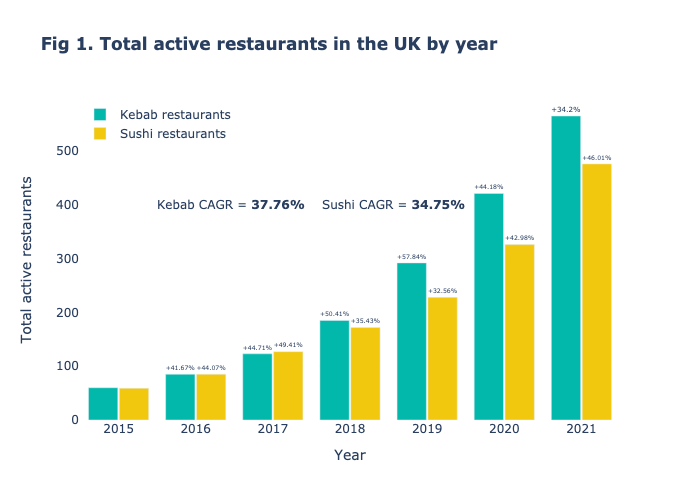

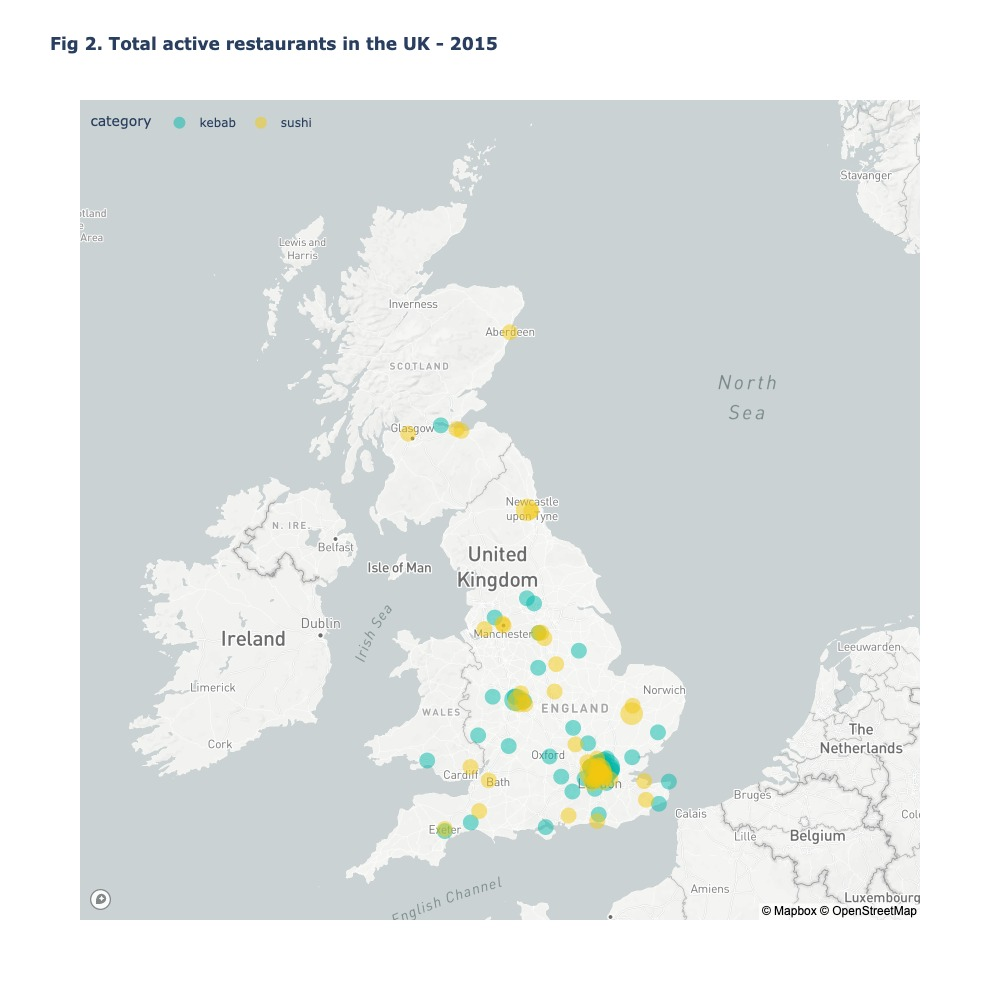

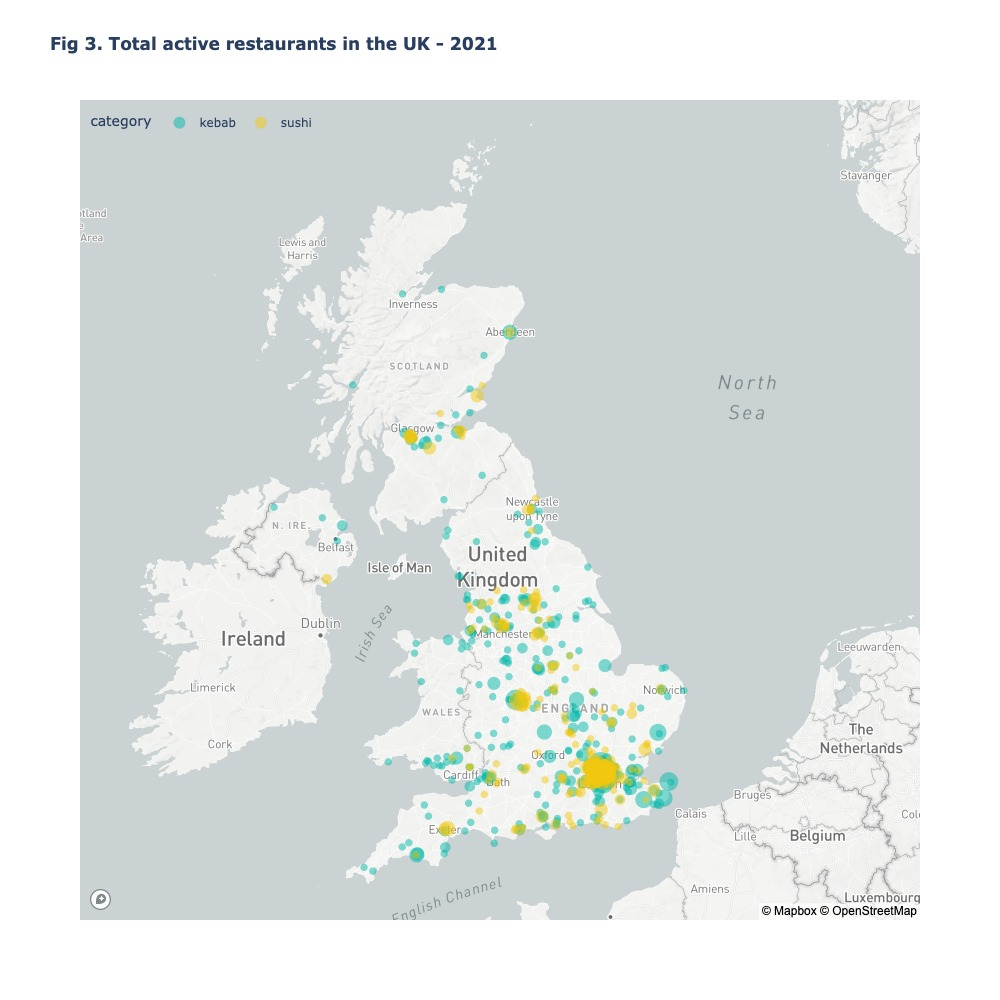

In [44]:
from IPython.display import display
fig_1 = Image(active_company_fig.to_image(format="png"), width=900)
fig_2 = Image(visualize_coordinates(active_company_2015_df, "2015", "Fig 2.").to_image(format="jpg"))
fig_3 = Image(visualize_coordinates(active_company_2021_df, "2021", "Fig 3.").to_image(format="jpg")) 
display(fig_1, fig_2, fig_3)

From anecdotal observation of the UK high street, kebab restaurants seem to be everywhere. To get a data-based understanding, we looked at how the number of kebab restaurants has grown from 2015-2021. To make sense of this data, we compare the growth curve with another trendy restaurant type – sushi houses. This comparison gives us an understanding of whether the increase in kebab restaurants was just a factor of industry forces (rising tide lifting all boats) or whether the “grab a kebab” was a stronger trend.

Fig. 1 shows the number of active kebab and sushi restaurants by year. From the chart, we can see that **kebab restaurants have indeed grown at a faster clip than sushi restaurants** over the 2015-21 period. 

More interestingly, Fig. 2 and Fig. 3 shows the geographic dispersion of these two types of restaurants. In 2015, kebabs and sushi restaurants were centred around the high population cities (London, Manchester, etc.). However, in 2021, though the total number of active restaurants are not too different, **kebab restaurants are spread out more evenly across the UK, while sushi houses remain in the urban centres.**

The results from this analysis show that while the number of kebab restaurants has experienced a slightly higher growth rate than sushi restaurants – they have also experienced a different “type” of growth, one that is more balanced and spread out to even the smaller towns in the UK.

Notes:
- Companies were labeled as “kebab restaurant” if “kebab” was in their company name and if their SIC industry code was for a food establishment. Same applies for “sushi restaurants”.
- Due to limitations of the API, we were only able to get a maximum of 1000 companies for each of our searches. Due to the assumed unordered nature of the search results, we take the results to be mostly random ordering, and not significantly biased on a particular factor.)
